# Q.1
Prepare a model for glass classification using KNN

Data Description:

RI : refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type: Type of glass: (class attribute)
1 -- building_windows_float_processed
 2 --building_windows_non_float_processed
 3 --vehicle_windows_float_processed
 4 --vehicle_windows_non_float_processed (none in this database)
 5 --containers
 6 --tableware
 7 --headlamps

In [ ]:
# KNN Classification
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df=pd.read_csv('glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
df=pd.DataFrame(df)
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
#EDA
df.shape

(214, 10)

In [ ]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [ ]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [ ]:
df[df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [ ]:
df1=df.drop_duplicates()
df1.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


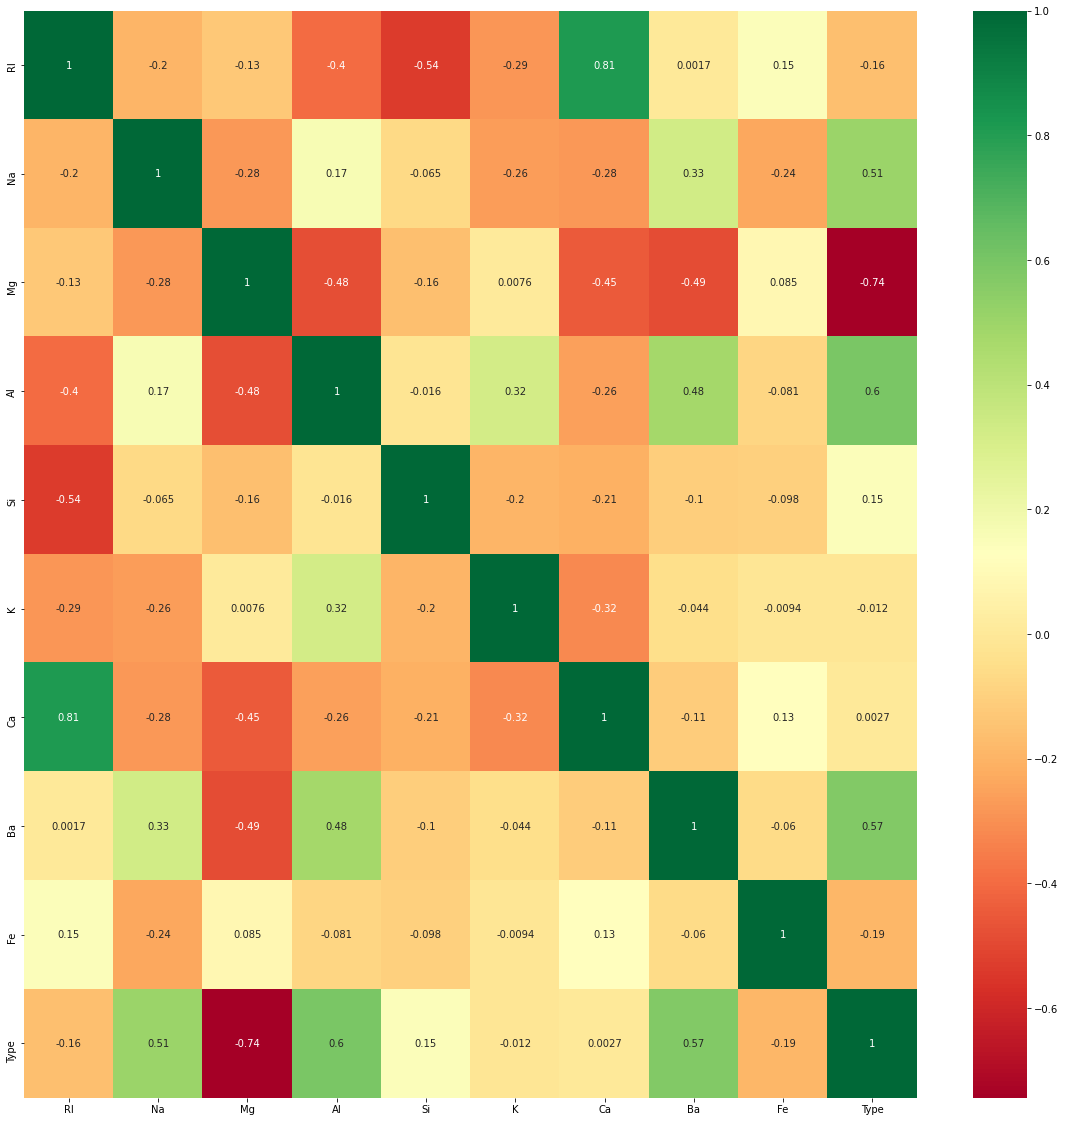

In [ ]:
#Feature Selection:(Correlation Matrix with Heatmap)
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = df1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

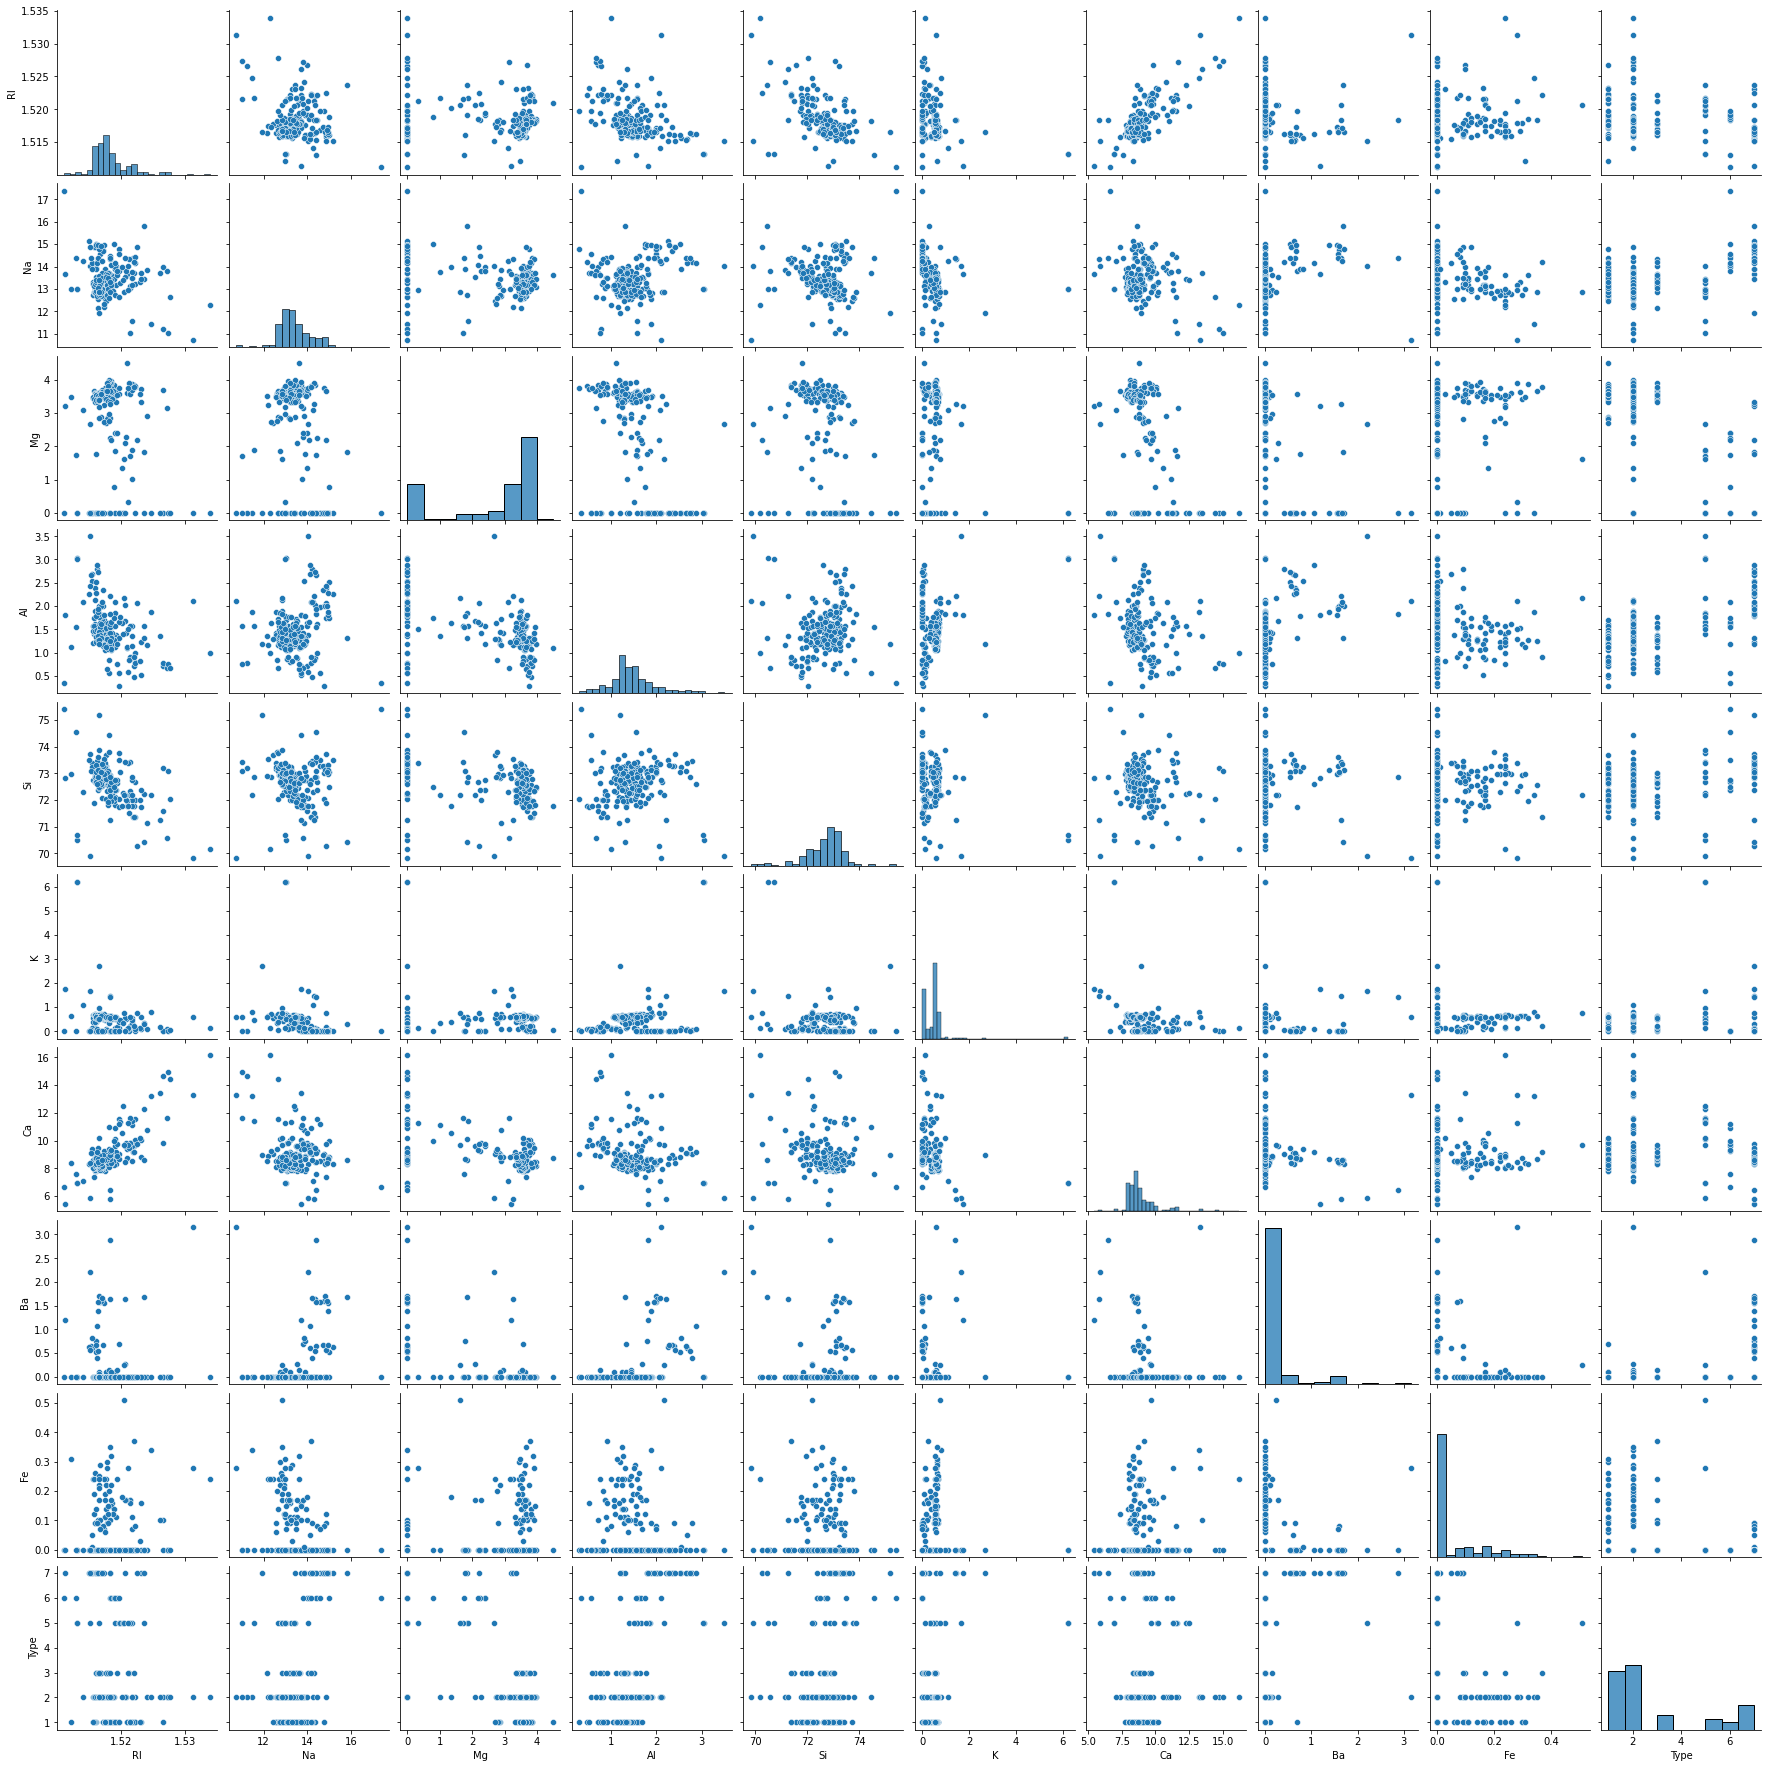

In [ ]:
import seaborn as sns
sns.pairplot(df1)

In [ ]:
x=df1.iloc[:,0:9]
y=df1.iloc[:,9]

In [ ]:
x,y

(          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe
 0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0
 1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0
 2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0
 3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0
 4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0
 ..       ...    ...   ...   ...    ...   ...   ...   ...  ...
 209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0
 210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0
 211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0
 212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0
 213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0
 
 [213 rows x 9 columns], 0      1
 1      1
 2      1
 3      1
 4      1
       ..
 209    7
 210    7
 211    7
 212    7
 213    7
 Name: Type, Length: 213, dtype: int64)

In [ ]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.25,random_state=40)

In [ ]:
# KNN Classification
num_folds = 10
kfold = KFold(n_splits=10)

In [ ]:
model = KNeighborsClassifier(n_neighbors=17)
results = cross_val_score(model, x_train, y_train, cv=kfold)

In [ ]:
print(results.mean())

0.6604166666666667


## Handling Imbalanced Dataset with Machine Learning¶

In [ ]:
#Under Sampling
from collections import Counter
Counter(y_train)

Counter({1: 55, 2: 53, 3: 11, 5: 11, 6: 6, 7: 23})

In [ ]:
from collections import Counter
from imblearn.under_sampling import NearMiss
ns=NearMiss(0.8)
x_train_ns,y_train_ns=ns.fit_sample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

In [ ]:
classifier= KNeighborsClassifier(n_neighbors=17)
 classifier.fit(x_train_ns,y_train_ns)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred=classifier.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

In [ ]:
#SMOTE
from imblearn.over_sampling import SMOTE
smote=SMOTE("minority")
X,Y=smote.fit_sample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(Y)))

The number of classes before fit Counter({1: 55, 2: 53, 7: 23, 3: 11, 5: 11, 6: 6})
The number of classes after fit Counter({1: 55, 6: 55, 2: 53, 7: 23, 3: 11, 5: 11})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
 classifier= KNeighborsClassifier(n_neighbors=17)
 classifier.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred=classifier.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[13  1  0  0  0  0]
 [10 10  0  0  3  0]
 [ 6  0  0  0  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  1  5]]
0.5740740740740741
              precision    recall  f1-score   support

           1       0.45      0.93      0.60        14
           2       0.91      0.43      0.59        23
           3       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         2
           6       0.33      1.00      0.50         3
           7       1.00      0.83      0.91         6

    accuracy                           0.57        54
   macro avg       0.45      0.53      0.43        54
weighted avg       0.63      0.57      0.54        54



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Over Sampling
¶from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(0.75)
x_train_ns,y_train_ns=os.fit_sample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(x_train_ns,y_train_ns)

In [ ]:
y_pred=classifier.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

In [ ]:
#Ensemble Techniques
from imblearn.ensemble import EasyEnsembleClassifier

In [ ]:
easy=EasyEnsembleClassifier()
easy.fit(x_train,y_train)

In [ ]:
y_pred=easy.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

### Grid Search for Algorithm Tuning

In [ ]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [ ]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.7862903225806452
{'n_neighbors': 1}


### Visualizing the CV results

In [ ]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5)
    k_scores.append(scores.mean())

In [ ]:
 scores.mean()

0.5594758064516129

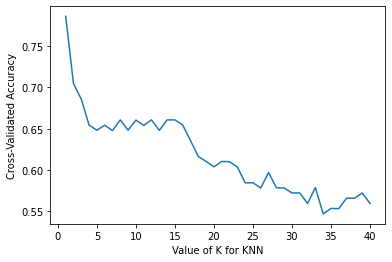

In [ ]:
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# Q.2 
Implement a KNN model to classify the animals in to categorie



In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline 

In [4]:
data=pd.read_csv('Zoo.csv')
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
data= data.rename({'animal name': 'animalname'}, axis=1)
data.head()

,animalname,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [6]:
data1=data.drop("animalname",axis=1)
data1


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [7]:
data1.shape

(101, 17)

In [8]:
data1.drop_duplicates

<bound method DataFrame.drop_duplicates of      hair  feathers  eggs  milk  airborne  ...  legs  tail  domestic  catsize  type
0       1         0     0     1         0  ...     4     0         0        1     1
1       1         0     0     1         0  ...     4     1         0        1     1
2       0         0     1     0         0  ...     0     1         0        0     4
3       1         0     0     1         0  ...     4     0         0        1     1
4       1         0     0     1         0  ...     4     1         0        1     1
..    ...       ...   ...   ...       ...  ...   ...   ...       ...      ...   ...
96      1         0     0     1         0  ...     2     1         0        1     1
97      1         0     1     0         1  ...     6     0         0        0     6
98      1         0     0     1         0  ...     4     1         0        1     1
99      0         0     1     0         0  ...     0     0         0        0     7
100     0         1     1     0  

In [9]:
data1.dtypes

hair        int64
feathers    int64
eggs        int64
milk        int64
airborne    int64
aquatic     int64
predator    int64
toothed     int64
backbone    int64
breathes    int64
venomous    int64
fins        int64
legs        int64
tail        int64
domestic    int64
catsize     int64
type        int64
dtype: object

In [ ]:
#Visualization
import seaborn as sns
plt.figure(figsize=(12,8))
sns.pairplot(data,hue='type')

In [8]:
X=data1.iloc[:,0:17]
y=data1.iloc[:,-1]

In [9]:
X,y

(     hair  feathers  eggs  milk  airborne  ...  legs  tail  domestic  catsize  type
 0       1         0     0     1         0  ...     4     0         0        1     1
 1       1         0     0     1         0  ...     4     1         0        1     1
 2       0         0     1     0         0  ...     0     1         0        0     4
 3       1         0     0     1         0  ...     4     0         0        1     1
 4       1         0     0     1         0  ...     4     1         0        1     1
 ..    ...       ...   ...   ...       ...  ...   ...   ...       ...      ...   ...
 96      1         0     0     1         0  ...     2     1         0        1     1
 97      1         0     1     0         1  ...     6     0         0        0     6
 98      1         0     0     1         0  ...     4     1         0        1     1
 99      0         0     1     0         0  ...     0     0         0        0     7
 100     0         1     1     0         1  ...     2     1      

In [ ]:
#Feature Selection:(using Tree Based Classifiers)
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.07707258 0.12982657 0.09897328 0.12420908 0.02880482 0.02635327
 0.00688314 0.06638429 0.06648651 0.06619407 0.00471184 0.06552013
 0.04057532 0.03683365 0.00032487 0.00628547 0.1545611 ]


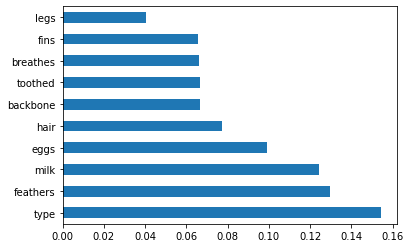

In [ ]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [10]:
#standardization
from sklearn.preprocessing import StandardScaler
stscaler = StandardScaler().fit(data1.iloc[:,0:17])
X = stscaler.transform(data1.iloc[:,0:17])
X

array([[ 1.16139451, -0.49690399, -1.18522652, ..., -0.38435306,
         1.13818037, -0.87545095],
       [ 1.16139451, -0.49690399, -1.18522652, ..., -0.38435306,
         1.13818037, -0.87545095],
       [-0.86103386, -0.49690399,  0.84372057, ..., -0.38435306,
        -0.87859537,  0.55839574],
       ...,
       [ 1.16139451, -0.49690399, -1.18522652, ..., -0.38435306,
         1.13818037, -0.87545095],
       [-0.86103386, -0.49690399,  0.84372057, ..., -0.38435306,
        -0.87859537,  1.99224243],
       [-0.86103386,  2.01246118,  0.84372057, ..., -0.38435306,
        -0.87859537, -0.39750205]])

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.30)

In [ ]:
#KNN Classification
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
pred = knn.predict(X_test)
pred

array([1, 2, 6, 2, 2, 5, 1, 3, 1, 1, 1, 6, 1, 2, 1, 1, 1, 4, 2, 1, 1, 1,
       1, 2, 4, 6, 1, 6, 1, 2, 2])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score


In [ ]:
print(confusion_matrix(y_test,pred))

[[15  0  0  0  0  0]
 [ 0  7  0  0  0  0]
 [ 0  1  1  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  4]]


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       0.88      1.00      0.93         7
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         4

    accuracy                           0.97        31
   macro avg       0.98      0.92      0.93        31
weighted avg       0.97      0.97      0.96        31



In [ ]:
print(accuracy_score(y_test,pred))

0.967741935483871


In [ ]:
#Alternative Method(1):

In [14]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

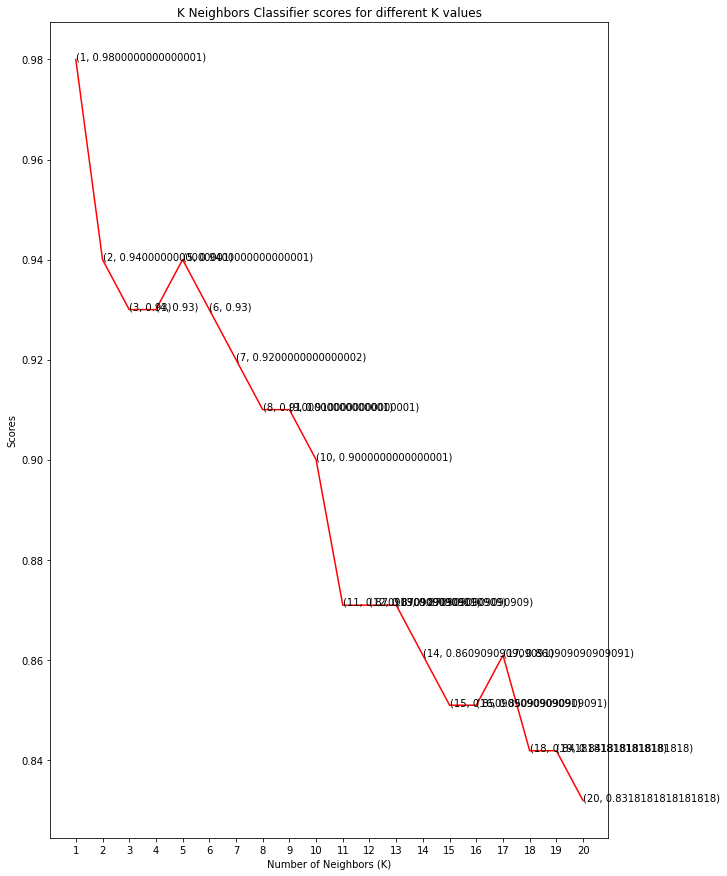

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.figure(figsize=(10,15))
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')


In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors =5)
score=cross_val_score(knn_classifier,X,y,cv=10)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [ ]:
score.mean()

0.9400000000000001

In [ ]:
#Alternative Method(2):
#Choosing a K Value
accuracy_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_train,y_train,cv=10)
    accuracy_rate.append(score.mean())

In [ ]:
error_rate = []
for i in range(1,40):
   knn = KNeighborsClassifier(n_neighbors=i)
   score=cross_val_score(knn,X_train,y_train,cv=10)
   error_rate.append(1-score.mean())

In [ ]:
error_rate = []
for i in range(1,40):
     knn = KNeighborsClassifier(n_neighbors=i)
     knn.fit(X_train,y_train)
     pred_i = knn.predict(X_test)
     error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

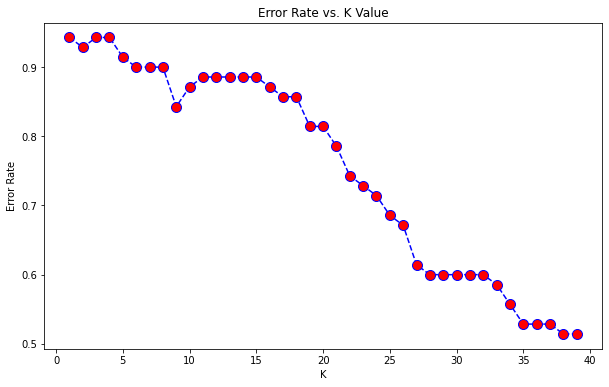

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.figure(figsize=(10,6))
#plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
  #       markerfacecolor='red', markersize=10)
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
#Here we can see that that after arouns K>4 the error rate is minimum. Now retrain the model and check the classification report.

In [ ]:
# comparison to K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))


WITH K=1


[[15  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0  6  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  1  0]
 [ 0  0  0  0  0  1  2]]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         1
           6       0.50      1.00      0.67         1
           7       1.00      0.67      0.80         3

    accuracy                           0.97        31
   macro avg       0.93      0.95      0.92        31
weighted avg       0.98      0.97      0.97        31



In [ ]:
# Now K=4
knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('K=4')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

K=4


[[15  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0  6  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  1  0]
 [ 0  0  0  0  0  2  1]]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         1
           6       0.33      1.00      0.50         1
           7       1.00      0.33      0.50         3

    accuracy                           0.94        31
   macro avg       0.90      0.90      0.86        31
weighted avg       0.98      0.94      0.94        31



In [ ]:
#XGBoost model
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
# fit model on training data
model = XGBClassifier()
model.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model,X_train,y_train,cv=10)
print(score.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


0.9857142857142858


In [ ]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
predictions

In [ ]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 100.00%
